#PHEME Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/My Drive/PHEME_Dataset.zip" /content/

In [ ]:
!unzip /content/PHEME_Dataset.zip -d /content/PHEME_Dataset

Archive:  /content/PHEME_Dataset.zip
 extracting: /content/PHEME_Dataset/PHEME_veracity.tar.bz2  
 extracting: /content/PHEME_Dataset/convert_veracity_annotations.py  


In [ ]:
!tar -xvzf /content/PHEME_Dataset/PHEME_veracity.tar.bz2 -C /content/PHEME_Dataset/ --keep-newer-files

Streaming output truncated to the last 5000 lines.
all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580327336505176064/reactions/580328034550427649.json
tar: Current ‘all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580327336505176064/reactions/580328034550427649.json’ is newer or same age
all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580327336505176064/reactions/._580329203297492993.json
tar: Current ‘all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580327336505176064/reactions/._580329203297492993.json’ is newer or same age
all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580327336505176064/reactions/580329203297492993.json
tar: Current ‘all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580327336505176064/reactions/580329203297492993.json’ is newer or same age
all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580327336505176064/reactions/._580333522537

##Data Visualisation

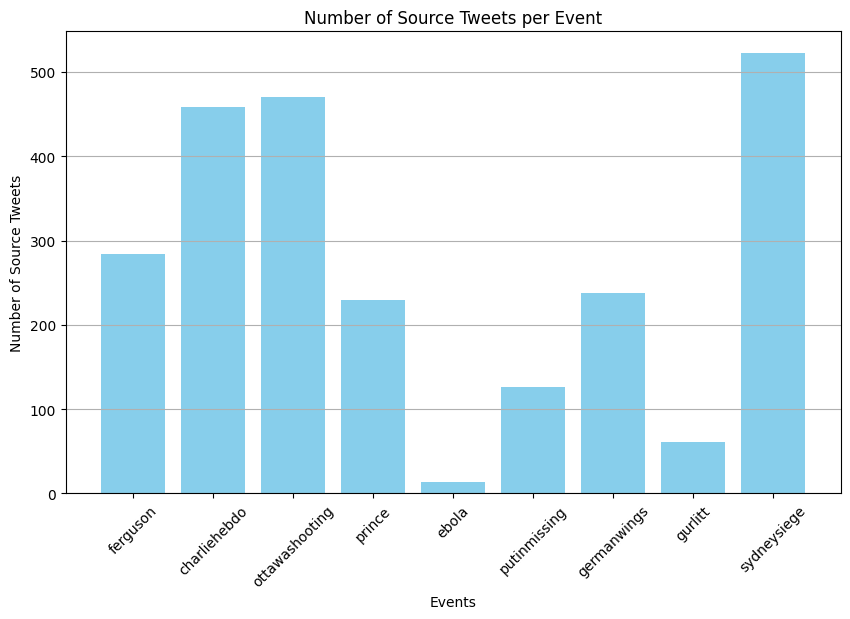

In [ ]:
import os
import matplotlib.pyplot as plt

# Assuming you have event-wise folders
events_path = '/content/PHEME_Dataset/all-rnr-annotated-threads'  # Adjust path
event_counts = {}

for event in os.listdir(events_path):
    event_folder = os.path.join(events_path, event, 'rumours')
    if os.path.isdir(event_folder):
        source_tweets = [f for f in os.listdir(event_folder) if not f.startswith('.')]
        event_counts[event.split('-')[0]] = len(source_tweets)

# Plotting
plt.figure(figsize=(10,6))
plt.bar(event_counts.keys(), event_counts.values(), color='skyblue')
plt.title('Number of Source Tweets per Event')
plt.xticks(rotation=45)
plt.ylabel('Number of Source Tweets')
plt.xlabel('Events')
plt.grid(axis='y')
plt.show()


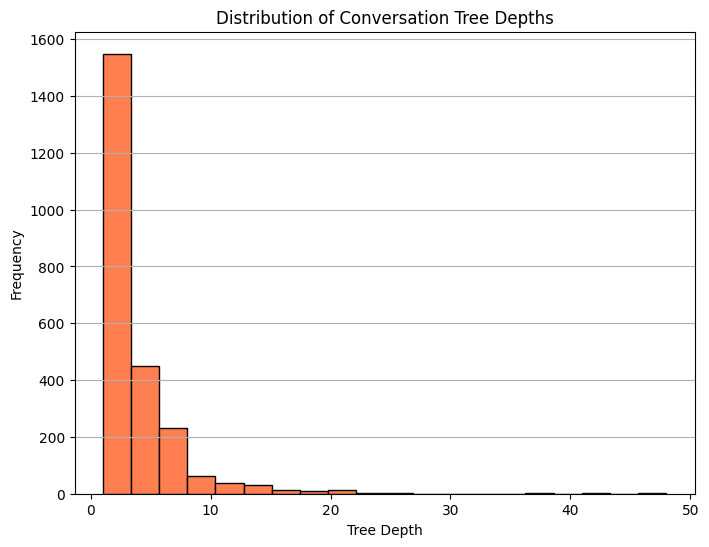

In [ ]:
import json

events_path = '/content/PHEME_Dataset/all-rnr-annotated-threads'

depths = []

def get_max_depth(tree, depth=0):
    if isinstance(tree, list) and not tree:
        return depth
    elif isinstance(tree, dict):
        return max(get_max_depth(child, depth+1) for child in tree.values())
    else:
        return depth

for event in os.listdir(events_path):
    rumours_path = os.path.join(events_path, event, 'rumours')
    if os.path.isdir(rumours_path):
        for thread_id in os.listdir(rumours_path):
            struct_path = os.path.join(rumours_path, thread_id, 'structure.json')
            if os.path.exists(struct_path):
                with open(struct_path, 'r') as f:
                    tree = json.load(f)
                    depths.append(get_max_depth(tree))

# Plotting
plt.figure(figsize=(8,6))
plt.hist(depths, bins=20, color='coral', edgecolor='black')
plt.title('Distribution of Conversation Tree Depths')
plt.xlabel('Tree Depth')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


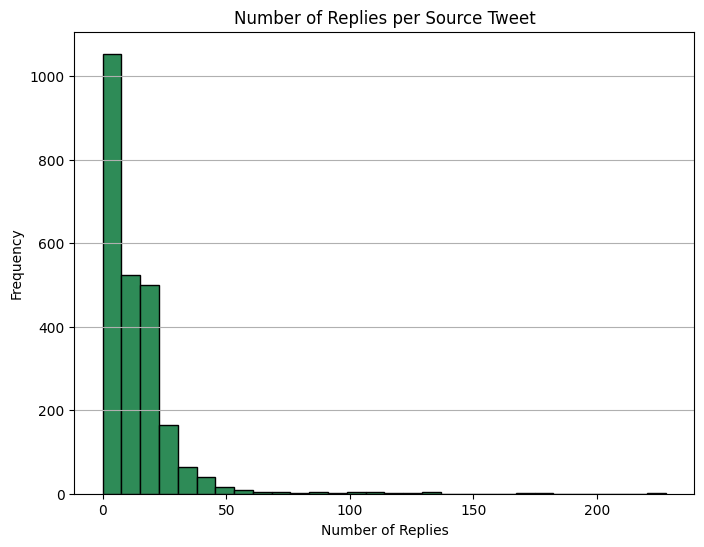

In [ ]:
replies_counts = []

for event in os.listdir(events_path):
    rumours_path = os.path.join(events_path, event, 'rumours')
    if os.path.isdir(rumours_path):
        for thread_id in os.listdir(rumours_path):
            replies_path = os.path.join(rumours_path, thread_id, 'reactions')
            if os.path.exists(replies_path):
              reply_file = [f for f in os.listdir(replies_path) if not f.startswith('.')]
              replies_counts.append(len(reply_file))

# Plotting
plt.figure(figsize=(8,6))
plt.hist(replies_counts, bins=30, color='seagreen', edgecolor='black')
plt.title('Number of Replies per Source Tweet')
plt.xlabel('Number of Replies')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


Streaming output truncated to the last 5000 lines.
/content/PHEME_Dataset/all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours/544388013141143552/reactions/544391733124268032.json
/content/PHEME_Dataset/all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours/544388013141143552/reactions/544391249038680065.json
/content/PHEME_Dataset/all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours/544388013141143552/reactions/544388523592527872.json
/content/PHEME_Dataset/all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours/544388013141143552/reactions/544388266862997504.json
/content/PHEME_Dataset/all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours/544388013141143552/reactions/544427048249602048.json
/content/PHEME_Dataset/all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours/544388013141143552/reactions/544390695167881216.json
/content/PHEME_Dataset/all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours/544388013141143552/reactions/5443902

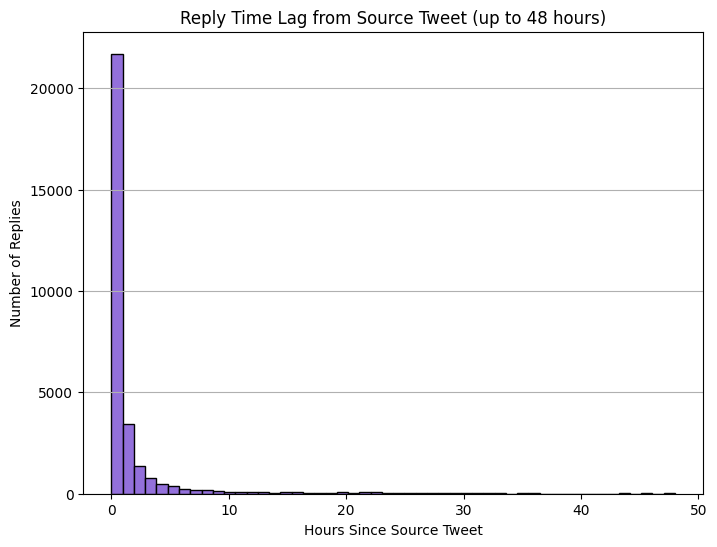

In [ ]:
import pandas as pd
from datetime import datetime

time_deltas = []

for event in os.listdir(events_path):
    rumours_path = os.path.join(events_path, event, 'rumours')
    if os.path.isdir(rumours_path):
        for thread_id in os.listdir(rumours_path):
            if thread_id.startswith('.'):
              continue
            source_path = os.path.join(rumours_path, thread_id, 'source-tweets', thread_id + '.json')
            replies_path = os.path.join(rumours_path, thread_id, 'reactions')
            if os.path.exists(source_path) and os.path.exists(replies_path):
                with open(source_path, 'r') as f:
                    source = json.load(f)
                source_time = pd.to_datetime(source['created_at'])
                for reply_file in os.listdir(replies_path):
                    if reply_file.startswith('.'):
                      continue
                    reply_path = os.path.join(replies_path, reply_file)

                    with open(reply_path, 'r') as rf:
                        reply = json.load(rf)
                        reply_time = pd.to_datetime(reply['created_at'])
                        delta = (reply_time - source_time).total_seconds() / 3600  # in hours
                        time_deltas.append(delta)

# Plotting
plt.figure(figsize=(8,6))
plt.hist(time_deltas, bins=50, color='mediumpurple', edgecolor='black', range=(0,48))
plt.title('Reply Time Lag from Source Tweet (up to 48 hours)')
plt.xlabel('Hours Since Source Tweet')
plt.ylabel('Number of Replies')
plt.grid(axis='y')
plt.show()


In [ ]:
missing_source = 0
missing_replies = 0

for event in os.listdir(events_path):
    rumours_path = os.path.join(events_path, event, 'rumours')
    if os.path.isdir(rumours_path):
        for thread_id in os.listdir(rumours_path):
            if thread_id.startswith('.'):
                continue
            source_path = os.path.join(rumours_path, thread_id, 'source-tweets', thread_id + '.json')
            replies_path = os.path.join(rumours_path, thread_id, 'reactions')
            if os.path.exists(source_path):
                with open(source_path, 'r') as f:
                    source = json.load(f)
                if 'created_at' not in source or 'screen_name' not in source['user']:
                    missing_source += 1
            if os.path.exists(replies_path):
                for reply_file in os.listdir(replies_path):
                    if reply_file.startswith('.'):
                      continue
                    with open(os.path.join(replies_path, reply_file), 'r') as rf:
                        reply = json.load(rf)
                    if 'created_at' not in reply or 'in_reply_to_status_id' not in reply or 'screen_name' not in reply['user']:
                        missing_replies += 1

print(f"Missing created_at in source tweets: {missing_source}")
print(f"Missing created_at or parent ID in replies: {missing_replies}")


Missing created_at in source tweets: 0
Missing created_at or parent ID in replies: 0


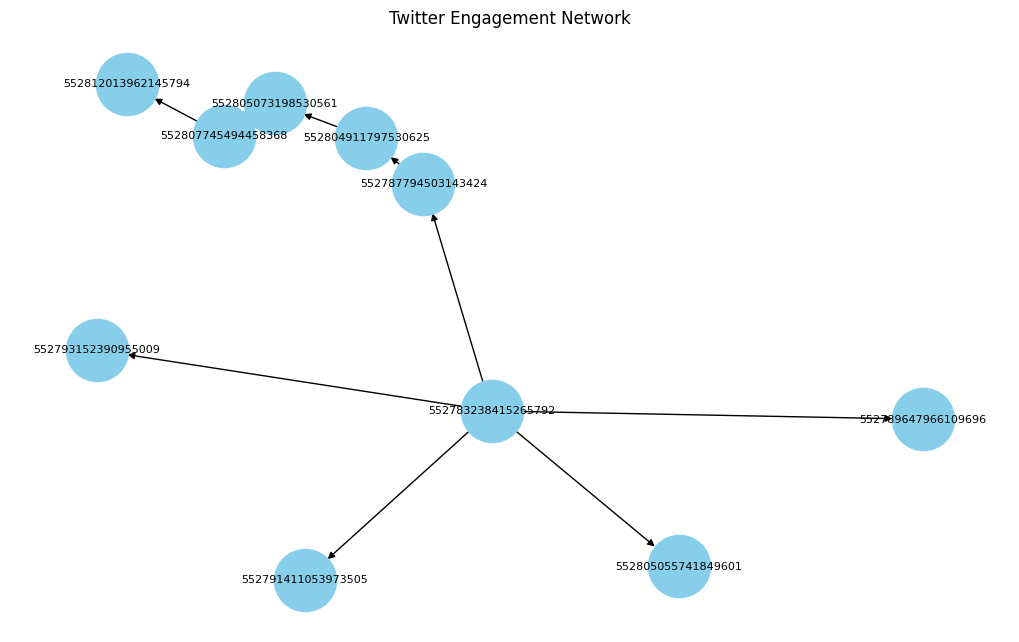

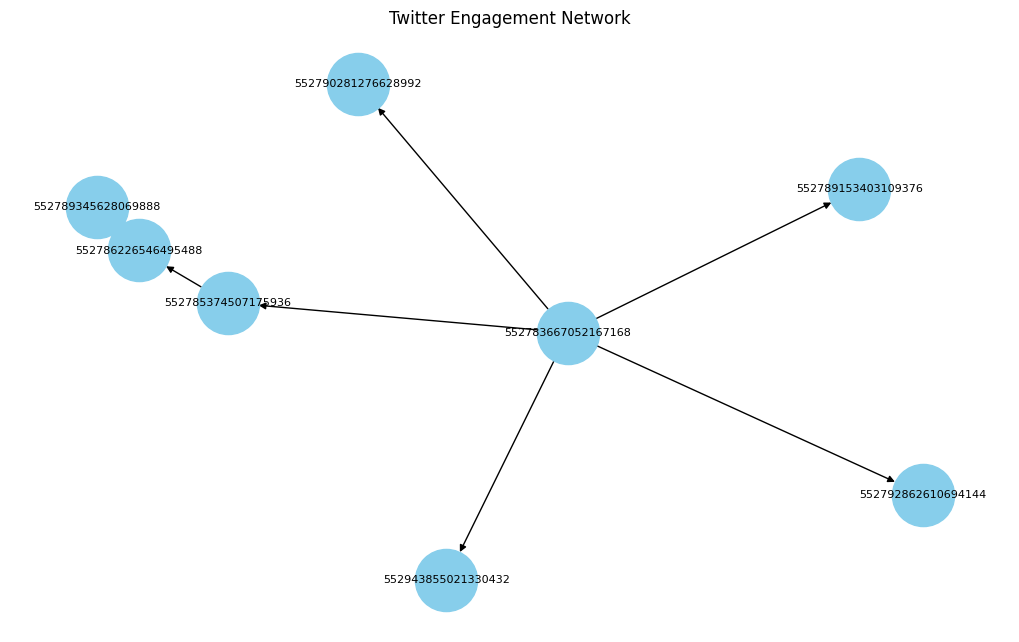

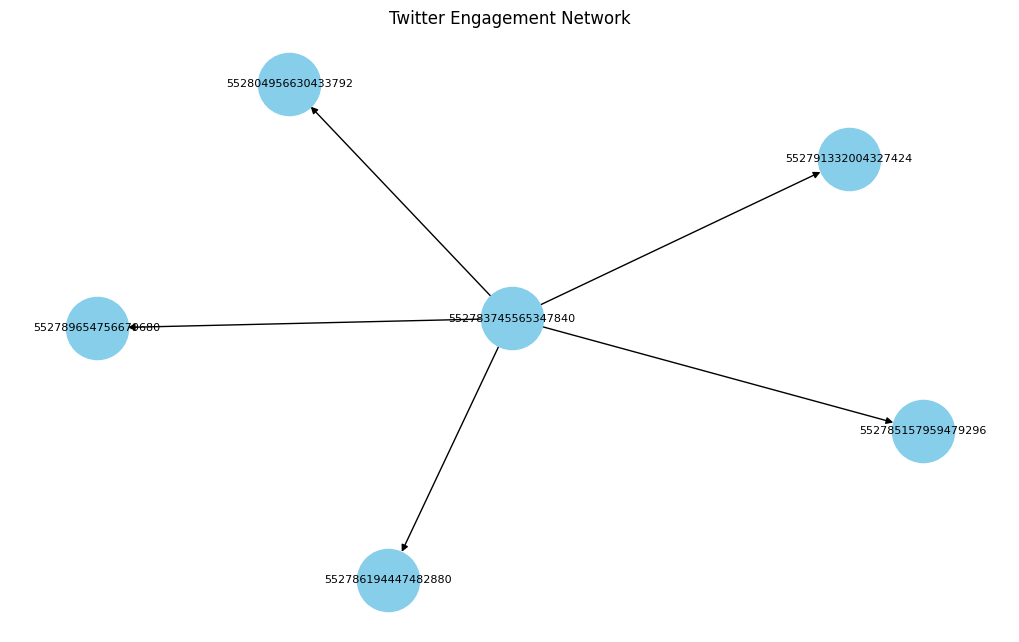

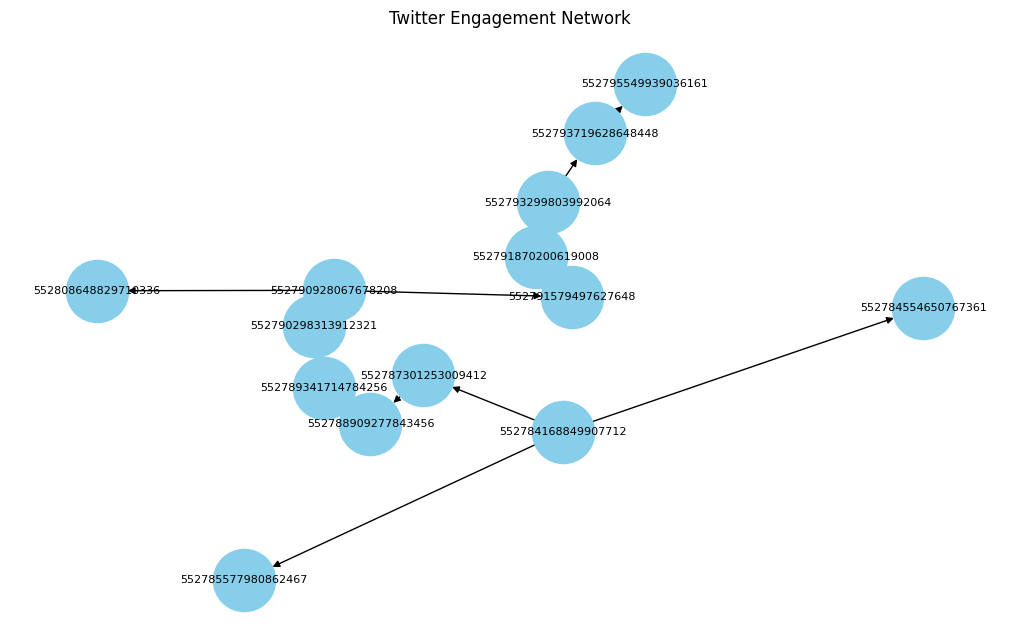

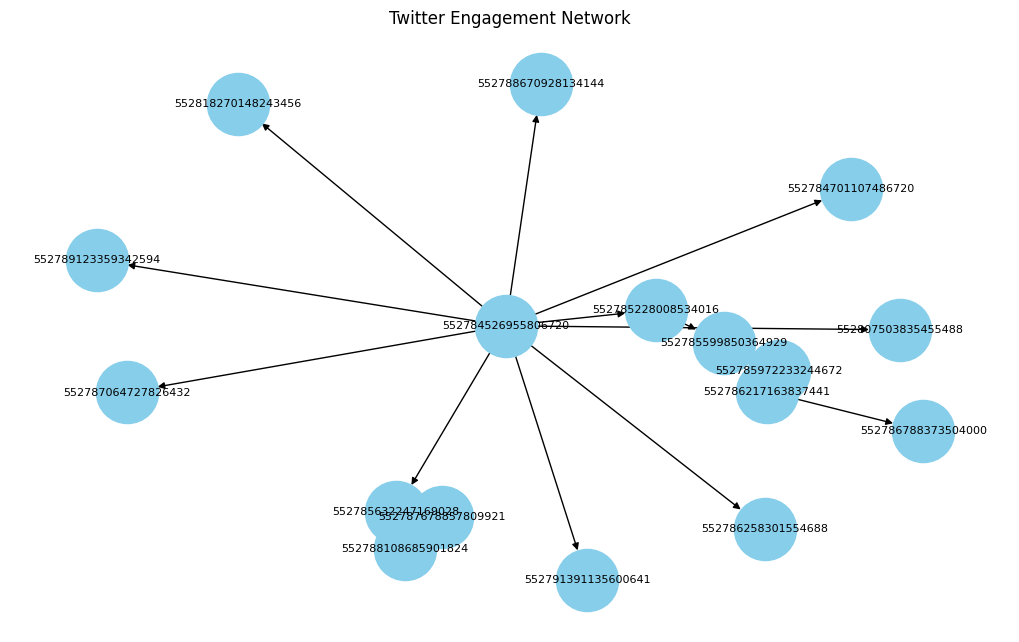

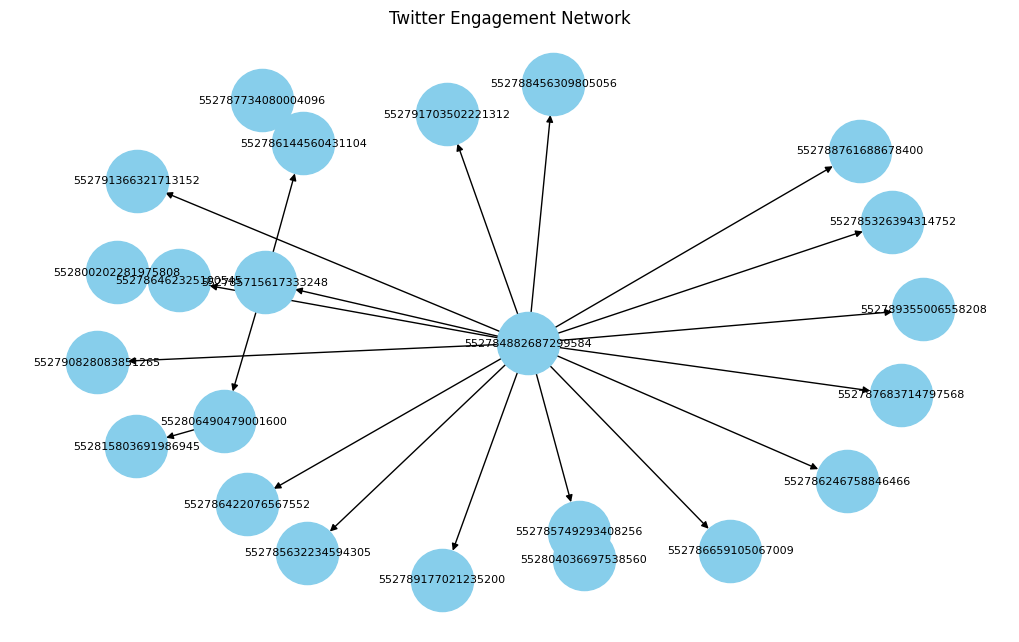

KeyboardInterrupt: 

In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

path = "/content/PHEME_Dataset/all-rnr-annotated-threads"
event = "charliehebdo-all-rnr-threads"

threads_path = os.path.join(path, event, "rumours")
for thread in sorted(os.listdir(threads_path)) :
  thread_path = os.path.join(threads_path, thread)
  if not os.path.isdir(thread_path):
    continue
  structure_file = os.path.join(thread_path, "structure.json")
  with open(structure_file, "r", encoding="utf-8") as f:
    structure = json.load(f)

  # Initialize a directed graph
  G = nx.DiGraph()

  # Recursive function to add edges
  def add_edges(parent, children):
      if isinstance(children, dict):
          for child, subchildren in children.items():
              G.add_edge(parent, child)
              add_edges(child, subchildren)
      elif isinstance(children, list):
          for child in children:
              G.add_edge(parent, child)

  # Top-level tweet (root)
  for root, replies in structure.items():
      G.add_node(root)
      add_edges(root, replies)

  # Optional: Draw the graph
  plt.figure(figsize=(10, 6))
  pos = nx.spring_layout(G, seed=42)
  nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=8, arrows=True)
  plt.title("Twitter Engagement Network")
  plt.show()

In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

path = "/content/PHEME_Dataset/all-rnr-annotated-threads"

for event in sorted(os.listdir(path)):
    threads_path = os.path.join(path, event, "rumours")
    if not os.path.isdir(threads_path):
        continue

    print(f"Processing event: {event}")

    # Create one combined graph per event
    G_event = nx.DiGraph()
    color_map = {}
    cmap = cm.get_cmap('tab20')  # Or 'hsv', 'tab10', etc.
    color_idx = 0

    for thread in sorted(os.listdir(threads_path)):
        thread_path = os.path.join(threads_path, thread)
        if not os.path.isdir(thread_path):
            continue

        structure_file = os.path.join(thread_path, "structure.json")
        if not os.path.exists(structure_file):
            continue

        with open(structure_file, "r", encoding="utf-8") as f:
            structure = json.load(f)

        # Assign a color for this thread
        thread_color = cmap(color_idx % cmap.N)
        color_idx += 1

        # Recursive edge adder
        def add_edges(parent, children):
            if isinstance(children, dict):
                for child, subchildren in children.items():
                    G_event.add_edge(parent, child)
                    color_map[parent] = thread_color
                    color_map[child] = thread_color
                    add_edges(child, subchildren)
            elif isinstance(children, list):
                for child in children:
                    G_event.add_edge(parent, child)
                    color_map[parent] = thread_color
                    color_map[child] = thread_color

        for root, replies in structure.items():
            G_event.add_node(root)
            color_map[root] = thread_color
            add_edges(root, replies)

    # Only plot if there’s data
    if G_event.number_of_nodes() > 0:
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(G_event, seed=42)
        node_colors = [color_map.get(node, (0.5, 0.5, 0.5)) for node in G_event.nodes()]
        nx.draw(G_event, pos, with_labels=False, node_color=node_colors,
                node_size=100, arrows=True, alpha=0.9)
        plt.title(f"Twitter Engagement Network – {event}")
        plt.show()


In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

path = "/content/PHEME_Dataset/all-rnr-annotated-threads"

for event in sorted(os.listdir(path)):
    threads_path = os.path.join(path, event, "rumours")
    if not os.path.isdir(threads_path):
        continue

    print(f"Processing event: {event}")

    # One graph per event
    G_event = nx.DiGraph()
    color_map = {}

    # Use a large colormap to allow enough distinct colors
    cmap = cm.get_cmap('tab20', 100)  # Up to 100 threads
    color_idx = 0

    for thread in sorted(os.listdir(threads_path)):
        thread_path = os.path.join(threads_path, thread)
        if not os.path.isdir(thread_path):
            continue

        structure_file = os.path.join(thread_path, "structure.json")
        if not os.path.exists(structure_file):
            continue

        with open(structure_file, "r", encoding="utf-8") as f:
            structure = json.load(f)

        # Assign unique color for this thread
        thread_color = cmap(color_idx)
        color_idx += 1

        # Recursive edge adder
        def add_edges(parent, children):
            if isinstance(children, dict):
                for child, subchildren in children.items():
                    G_event.add_edge(parent, child)
                    color_map[parent] = thread_color
                    color_map[child] = thread_color
                    add_edges(child, subchildren)
            elif isinstance(children, list):
                for child in children:
                    G_event.add_edge(parent, child)
                    color_map[parent] = thread_color
                    color_map[child] = thread_color

        for root, replies in structure.items():
            G_event.add_node(root)
            color_map[root] = thread_color
            add_edges(root, replies)

    if G_event.number_of_nodes() > 0:
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(G_event, seed=42)
        node_colors = [color_map.get(node, (0.5, 0.5, 0.5)) for node in G_event.nodes()]
        nx.draw(G_event, pos, with_labels=False, node_color=node_colors,
                node_size=100, arrows=True, alpha=0.9)
        plt.title(f"Engagement Network – {event}")
        plt.show()


To count the number of replies in each twitter engagement for a particular event

In [ ]:
import os
import json
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm

path = "/content/PHEME_Dataset/all-rnr-annotated-threads"
# event = "gurlitt-all-rnr-threads"

for event in sorted(os.listdir(path)) :
  event_path = os.path.join(path, event)
  if not os.path.isdir(event_path):
      continue

  threads_path = os.path.join(event_path, "rumours")

  thread_count = 0
  total_reply_count = 0

  for thread in sorted(os.listdir(threads_path)):
      thread_path = os.path.join(threads_path, thread)
      if not os.path.isdir(thread_path):
          continue

      thread_count += 1

      replies_path = os.path.join(thread_path, "reactions")
      reply_count = 0
      for reply in os.listdir(replies_path) :
        reply_path = os.path.join(replies_path, reply)
        if not os.path.isdir(thread_path):
          continue

        reply_count += 1

      total_reply_count += reply_count
      # print("Tweet", thread_count, ":", reply_count)

  print(event, thread_count, total_reply_count)

charliehebdo-all-rnr-threads 458 13769
ebola-essien-all-rnr-threads 14 419
ferguson-all-rnr-threads 284 12392
germanwings-crash-all-rnr-threads 238 4512
gurlitt-all-rnr-threads 61 52
ottawashooting-all-rnr-threads 470 11932
prince-toronto-all-rnr-threads 229 1332
putinmissing-all-rnr-threads 126 722
sydneysiege-all-rnr-threads 522 16310


##Data Preprocessing

Load data into CSVs.

In [ ]:
import os
import json
import csv

path = "/content/PHEME_Dataset/all-rnr-annotated-threads"
output_base_path = "/content/Pheme_Dataset_files"

os.makedirs(output_base_path, exist_ok=True)

for event in sorted(os.listdir(path)) :
  event_path = os.path.join(path, event)
  if not os.path.isdir(event_path):
      continue

  event_name = event.split('-')[0]

  threads_path = os.path.join(event_path, "rumours")

  for thread in sorted(os.listdir(threads_path)):
      thread_path = os.path.join(threads_path, thread)
      if not os.path.isdir(thread_path):
          continue


      source_tweets = []
      replies = []

      thread_output_path = os.path.join(output_base_path, event_name, thread)
      os.makedirs(thread_output_path, exist_ok=True)

      source_dir = os.path.join(thread_path, "source-tweets")
      if os.path.isdir(source_dir):
          for file in os.listdir(source_dir):
              if file.endswith(".json") and not file.startswith("."):
                  with open(os.path.join(source_dir, file), "r", encoding="utf-8") as f:
                      tweet = json.load(f)
                      source_tweets.append(tweet)

      replies_path = os.path.join(thread_path, "reactions")
      if os.path.isdir(replies_path):
          for file in os.listdir(replies_path):
              if file.endswith(".json") and not file.startswith("."):
                  with open(os.path.join(replies_path, file), "r", encoding="utf-8", errors = 'replace') as f:
                      tweet = json.load(f)
                      replies.append(tweet)

      if source_tweets:
        keys = set()
        for t in source_tweets:
            keys.update(t.keys())
        keys = list(keys)

        with open(os.path.join(thread_output_path, "source.csv"), "w", newline="", encoding="utf-8") as f:
            writer = csv.DictWriter(f, fieldnames=keys)
            writer.writeheader()
            writer.writerows(source_tweets)

      # Save replies to CSV
      if replies:
        keys = set()
        for t in replies:
            keys.update(t.keys())
        keys = list(keys)

        with open(os.path.join(thread_output_path, "replies.csv"), "w", newline="", encoding="utf-8") as f:
            writer = csv.DictWriter(f, fieldnames=keys)
            writer.writeheader()
            writer.writerows(replies)

Choose the files based on number of replies and multilevel engagements

In [ ]:
import pandas as pd
import os
import networkx as nx

def analyze_thread(source_csv, replies_csv):
    # Load the source tweet and replies
    source_df = pd.read_csv(source_csv)
    replies_df = pd.read_csv(replies_csv)

    # Combine them into a single DataFrame
    df = pd.concat([source_df, replies_df], ignore_index=True)

    # Build reply graph
    G = nx.DiGraph()

    # Add nodes and edges based on replies
    for _, row in df.iterrows():
        tweet_id = row['id']
        reply_to = row['in_reply_to_status_id']
        G.add_node(tweet_id)
        if not pd.isna(reply_to):
            G.add_edge(reply_to, tweet_id)

    # Total replies (excluding the source tweet)
    num_replies = len(replies_df)

    # Compute tree depth
    roots = [n for n, d in G.in_degree() if d == 0]
    if len(roots) == 1:
        depth = nx.algorithms.dag.dag_longest_path_length(G)
    else:
        depth = max(nx.algorithms.dag.dag_longest_path_length(G.subgraph(nx.descendants(G, root))) for root in roots)

    # Time span of the conversation
    df['created_at'] = pd.to_datetime(df['created_at'], format="%a %b %d %H:%M:%S %z %Y")
    time_span = (df['created_at'].max() - df['created_at'].min()).total_seconds() / 3600  # in hours

    return num_replies, depth, time_span


# Now loop through the directories to gather the metrics
scores = []
event_folder = "/content/Pheme_Dataset_files/charliehebdo"  # Adjust to your specific event folder

# Loop through each tweet folder in the event folder
for tweet_folder in os.listdir(event_folder):
    tweet_folder_path = os.path.join(event_folder, tweet_folder)
    if os.path.isdir(tweet_folder_path):
        source_csv = os.path.join(tweet_folder_path, 'source.csv')
        replies_csv = os.path.join(tweet_folder_path, 'replies.csv')

        if os.path.exists(source_csv) and os.path.exists(replies_csv):
            replies, depth, span = analyze_thread(source_csv, replies_csv)
            scores.append((tweet_folder, replies, depth, span))

# Sort and pick the top 5 threads based on the number of replies and depth
scores.sort(key=lambda x: (x[1], x[2]), reverse=True)
top5 = scores[:5]

# Print the top 5 threads
for tweet_folder, replies, depth, span in top5:
    print(f"{tweet_folder}: {replies} replies, depth {depth}, time span {span:.2f} hrs")


552993818816299008: 177 replies, depth 9, time span 28.54 hrs
552793552376569857: 171 replies, depth 9, time span 15.76 hrs
552792271243210754: 133 replies, depth 8, time span 12.88 hrs
552805488631758849: 110 replies, depth 7, time span 49.75 hrs
552808071387701248: 109 replies, depth 5, time span 9.02 hrs


In [ ]:
scores

[('552993818816299008', 177, 9, 28.54222222222222),
 ('552793552376569857', 171, 9, 15.761388888888888),
 ('552792271243210754', 133, 8, 12.883333333333333),
 ('552805488631758849', 110, 7, 49.74861111111111),
 ('552808071387701248', 109, 5, 9.018888888888888),
 ('552795773180858368', 104, 5, 16.461666666666666),
 ('552984916070531072', 84, 3, 188.24444444444444),
 ('552985855854661633', 77, 6, 45.543055555555554),
 ('552788886355996672', 60, 7, 3.8333333333333335),
 ('553542565593878528', 57, 5, 4.522777777777778),
 ('552845136414380032', 54, 5, 2.7583333333333333),
 ('553133704881917952', 51, 6, 216.01333333333332),
 ('553529196216344576', 47, 8, 1.2180555555555554),
 ('553141087725170688', 44, 4, 35.205555555555556),
 ('553588494661337089', 43, 4, 2.1222222222222222),
 ('553474514496278528', 41, 2, 14.631388888888889),
 ('552806309540528128', 39, 6, 27.829722222222223),
 ('552821287933202435', 39, 5, 0.8736111111111111),
 ('552813461953323008', 38, 3, 1.0952777777777778),
 ('5531368

Create Annotation pairs.

In [ ]:
import shutil
import os

# Replace with your actual values
event = "charliehebdo"  # or any other event
base_path = "/content/Pheme_Dataset_files"
output_folder = "top5_annotation_threads"

# Clean previous output if it exists
if os.path.exists(output_folder):
    shutil.rmtree(output_folder)

os.makedirs(output_folder, exist_ok=True)

# Copy the top 5 tweet folders
for tweet_folder, _, _, _ in top5:
    src_path = os.path.join(base_path, event, tweet_folder)
    dst_path = os.path.join(output_folder, tweet_folder)
    shutil.copytree(src_path, dst_path)

# Create a zip file
shutil.make_archive("top5_annotation_threads", 'zip', output_folder)


'/content/top5_annotation_threads.zip'

In [ ]:
import pandas as pd
import os
import csv
import ast

event = "charliehebdo"  # or any other event
base_path = "/content/Pheme_Dataset_files"

rows = []
output_csv = "sample_dataset.csv"

# Helper to parse timestamp
def parse_time(ts):
    return pd.to_datetime(ts, format="%a %b %d %H:%M:%S %z %Y")

# Loop through each of the top 5 threads
for tweet_folder, _, _, _ in top5:
    tweet_path = f"{base_path}/{event}/{tweet_folder}"

    # Load source tweet
    source_df = pd.read_csv(os.path.join(tweet_path, "source.csv"))
    source_df["created_at"] = source_df["created_at"].apply(parse_time)

    # Load replies
    replies_df = pd.read_csv(os.path.join(tweet_path, "replies.csv"))
    replies_df["created_at"] = replies_df["created_at"].apply(parse_time)

    # Create a lookup for all tweet texts
    tweet_texts = {row["id"]: row["text"] for _, row in source_df.iterrows()}
    tweet_times = {row["id"]: row["created_at"] for _, row in source_df.iterrows()}
    tweet_username = {}

    for _, row in source_df.iterrows():
      user_info = ast.literal_eval(row["user"])
      tweet_username[row["id"]] = user_info["screen_name"]

    for _, row in replies_df.iterrows():
        reply_id = row["id"]

        # Add to text/time lookup in case reply gets replied to
        tweet_texts[reply_id] = row["text"]
        tweet_times[reply_id] = row["created_at"]
        user_info = ast.literal_eval(row["user"])
        tweet_username[reply_id] = user_info["screen_name"]

    for _, row in replies_df.iterrows():
        reply_id = row["id"]
        parent_id = row["in_reply_to_status_id"]

        if parent_id in tweet_texts:
            rows.append([
                parent_id, tweet_username[parent_id], tweet_texts[parent_id], tweet_times[parent_id],
                reply_id, tweet_username[reply_id], row["text"], row["created_at"]
            ])
        else :
          print(f"{parent_id} for {reply_id} not found")

# Save to CSV
columns = ["parent_id", "parent_username", "parent_text", "parent_time", "reply_id", "reply_username", "reply_text", "reply_time"]
with open(output_csv, "w", newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(columns)
    writer.writerows(rows)

print(f"{len(rows)} tweet-reply pairs saved to {output_csv}")


552793785264918529 for 552794979769520128 not found
552819252705492992 for 552824157633646594 not found
552822334336151552 for 552823413639610368 not found
552825768690991104 for 552843131977498624 not found
552823560670965761 for 552824703144837121 not found
552819252705492992 for 552820020904861696 not found
552820492113956864 for 552823786370629632 not found
552821480895967232 for 552821964448862208 not found
552823560670965761 for 552824458352680961 not found
5.529245742923858e+17 for 552924904283455488 not found
5.529305807790039e+17 for 552932825419493376 not found
5.529305807790039e+17 for 552933213367451648 not found
5.52833898493653e+17 for 552836814612860928 not found
5.528403105316864e+17 for 552840808995749888 not found
5.5291284950982246e+17 for 552914941234393088 not found
5.52833898493653e+17 for 552836780316454912 not found
5.529199486922916e+17 for 552922585676390400 not found
5.528246555105239e+17 for 552825242864091136 not found
5.5282357029309645e+17 for 55282693885

In [ ]:
from google.colab import files
files.download("top5_annotation_threads.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv("/content/sample_dataset.csv")
# Assuming your DataFrame is called df
sampled_df = df.sample(n=300, random_state=42)  # random_state for reproducibility
sampled_df["parent_id"] = sampled_df["parent_id"].astype(int)

# Save to CSV
sampled_df.to_csv("annotation_pairs.csv", index=False)

In [ ]:
import pandas as pd

# Read the CSVs
df1 = pd.read_csv('/content/sample_dataset.csv')  # 651 pairs
df2 = pd.read_csv('/content/annotated_pairs.csv')  # 300 pairs

# Assuming both have columns like 'tweet_id_1' and 'tweet_id_2'
# If column names are different, replace accordingly

# Merge the two tweet ids into a single string for easy comparison
# df1['pair'] = df1['parent_id'].astype(str) + '-' + df1['reply_id'].astype(str)
# df2['pair'] = df2['parent_id'].astype(str) + '-' + df2['reply_id'].astype(str)

# Find the pairs present in file1 but not in file2
mask = ~df1.set_index(['parent_id', 'reply_id']).index.isin(df2.set_index(['parent_id', 'reply_id']).index)
result = df1[mask]
# Drop the helper 'pair' column if needed
#df1 = df1.drop(columns=['pair'])
result["parent_id"] = result["parent_id"].astype(int)

# Save or display the remaining pairs
result.to_csv('annotated_pairs2.csv', index=False)
print(len(result))


351


<ipython-input-22-3903682dc596>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["parent_id"] = result["parent_id"].astype(int)


In [ ]:
df1 = pd.read_csv('/content/annotated_pairs2.csv')  # 351 pairs
df2 = pd.read_csv('/content/annotated_pairs.csv')  # 300 pairs

common = pd.merge(df1, df2, on=['parent_id', 'reply_id'], how='inner')
print(common)

Empty DataFrame
Columns: [parent_id, parent_text_x, parent_time_x, reply_id, reply_text_x, reply_time_x, label_x, parent_text_y, parent_time_y, reply_text_y, reply_time_y, label_y]
Index: []


##Network Generation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df1 = pd.read_csv("/content/sample_dataset.csv")
df2 = pd.read_csv("/content/annotated_pairs.csv")
df3 = pd.read_csv("/content/annotated_pairs2.csv")

df = pd.concat([df2, df3])
print(len(df))

651


In [ ]:
result = pd.merge(df, df1, on=['parent_id', 'reply_id'], how='inner').drop(columns = ['parent_id', 'parent_text_x', 'parent_time_x', 'reply_id',
       'reply_text_x', 'reply_time_x', 'parent_text_y', 'parent_time_y', 'reply_text_y',])

In [ ]:
result.columns

Index(['label', 'parent_username', 'reply_username', 'reply_time_y'], dtype='object')

In [ ]:
# Helper to parse timestamp
def parse_time(ts):
    return pd.to_datetime(ts, format="%a %b %d %H:%M:%S %z %Y")

rows = []

# Loop through each of the top 5 threads
for tweet_folder, _, _, _ in top5:
    tweet_path = f"{base_path}/{event}/{tweet_folder}"

    # Load source tweet
    source_df = pd.read_csv(os.path.join(tweet_path, "source.csv"))
    source_df["created_at"] = source_df["created_at"].apply(parse_time)

    for _, row in source_df.iterrows():
      user_info = ast.literal_eval(row["user"])

      rows.append({'label': 'Im', 'parent_username': None, 'reply_username': user_info['screen_name'], 'reply_time_y': row['created_at']})

result = pd.concat([result, pd.DataFrame(rows)], ignore_index = True)
print(len(result))

656


In [ ]:
result.to_csv("network_dataset.csv", index = False)

Directed graph with 99 nodes and 193 edges.


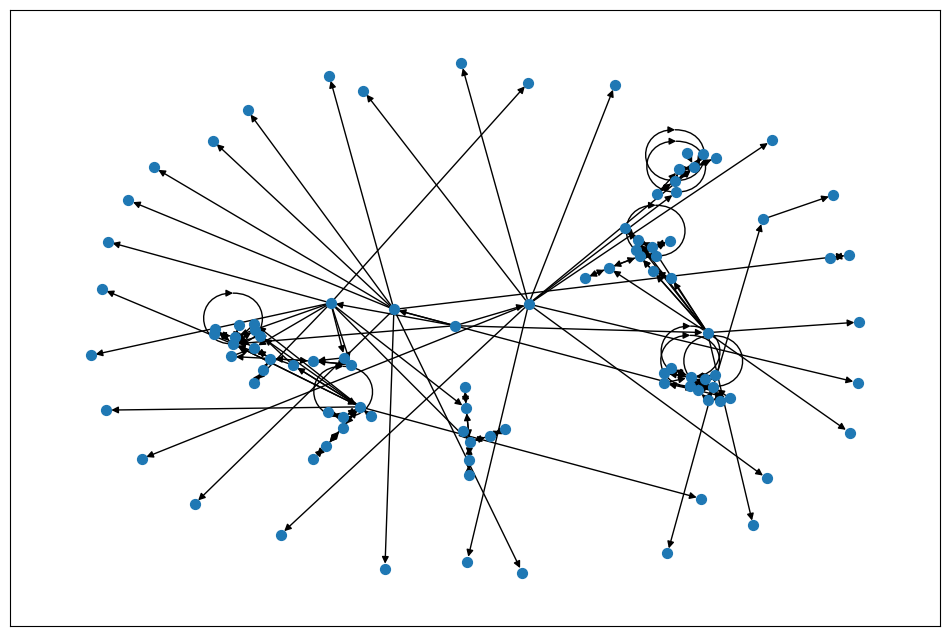

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/network_dataset.csv')

# Create a **directed** graph (because reply direction matters)
G = nx.DiGraph()

# Add nodes and record first activity time
for idx, row in df.iterrows():
    source_user = row['parent_username']
    reply_user = row['reply_username']
    stance = row['label']
    timestamp = pd.to_datetime(row['reply_time_y'])

    # Add source node and store the earliest timestamp
    if source_user not in G:
        G.add_node(source_user, state=None, first_activity_time=timestamp)
    else:
        if timestamp < G.nodes[source_user]['first_activity_time']:
            G.nodes[source_user]['first_activity_time'] = timestamp

    # Add reply node
    if reply_user not in G:
        G.add_node(reply_user, state=None, first_activity_time=timestamp)
    else:
        if timestamp < G.nodes[reply_user]['first_activity_time']:
            G.nodes[reply_user]['first_activity_time'] = timestamp

    # Add directed edge (source -> reply)
    G.add_edge(source_user, reply_user, stance=stance, timestamp=timestamp)

# Initialize node states:

# 1. Set source nodes (those who posted original tweets) as 'Im'
source_users = set(df['parent_username']) - set(df['reply_username'])
for user in source_users:
    if G.nodes[user]['state'] is None:
        G.nodes[user]['state'] = 'Im'

df = df.sort_values(by='reply_time_y')

# 2. Set reply users based on stance
for idx, row in df.iterrows():
    source_user = row['parent_username']
    reply_user = row['reply_username']
    stance = row['label']

    source_state = G.nodes[source_user].get('state', None)

    if G.nodes[reply_user]['state'] is None:
        if stance == 'S':
            if source_state == 'Im':
                G.nodes[reply_user]['state'] = 'Im'
            elif source_state == 'Ii':
                G.nodes[reply_user]['state'] = 'Ii'
        elif stance == 'D':
            if source_state == 'Im':
                G.nodes[reply_user]['state'] = 'Ii'
            elif source_state == 'Ii':
                G.nodes[reply_user]['state'] = 'Im'
        else:
            G.nodes[reply_user]['state'] = 'U'

# Optional: Print summary
print(f"Directed graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Small visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, node_size=50, with_labels=False, arrows=True)
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/content/network_dataset.csv')  # Assuming columns: source_user, reply_user, stance, timestamp

df = df.rename(columns = {'parent_username' : 'source_user', 'reply_username': 'reply_user', 'label': 'stance', 'reply_time_y': 'timestamp'})

print(df.columns)

# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Sort by timestamp
df = df.sort_values(by='timestamp')

# Split 60-40
split_idx = int(0.6 * len(df))
train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

print("Training set size:", len(train_df))
print("Testing set size:", len(test_df))


Index(['stance', 'source_user', 'reply_user', 'timestamp'], dtype='object')
Training set size: 393
Testing set size: 263


In [ ]:
df = pd.read_csv('/content/network_dataset.csv')

# Step 1: Sort dataframe by reply timestamp
df = df.rename(columns = {'parent_username' : 'source_user', 'reply_username': 'reply_user', 'label': 'stance', 'reply_time_y': 'timestamp'})
df['timestamp'] = pd.to_datetime(df['timestamp'])
df_sorted = df.sort_values(by='timestamp')

# Step 2: Split into 60%-40% based on number of edges (rows)
split_idx = int(0.6 * len(df_sorted))
df_train = df_sorted.iloc[:split_idx]
df_test = df_sorted.iloc[split_idx:]

print("Training set size:", len(df_train))

exposed_to_Ii = set()
converted_by_Ii = set()

# Step 3: Create training graph
G_train = nx.DiGraph()
for _, row in df_train.iterrows():
    src = row['source_user']
    tgt = row['reply_user']
    stance = row['stance']
    timestamp = pd.to_datetime(row['timestamp'])

    # Add nodes with their first activity time
    for user in [src, tgt]:
        if user not in G_train:
            G_train.add_node(user, state=None, first_activity_time=timestamp)
        else:
            if timestamp < G_train.nodes[user]['first_activity_time']:
                G_train.nodes[user]['first_activity_time'] = timestamp

    G_train.add_edge(src, tgt, timestamp=timestamp, stance=stance)

Im_users = source_users
for user in Im_users:
    if G_train.nodes[user]['state'] is None:
        G_train.nodes[user]['state'] = 'Im'

df_train = df_train.sort_values(by='timestamp')

# 2. Set reply users based on stance
for idx, row in df_train.iterrows():
    source_user = row['source_user']
    reply_user = row['reply_user']
    stance = row['stance']

    source_state = G_train.nodes[source_user].get('state', None)

    if stance == 'S':
        if source_state == 'Im':
            G_train.nodes[reply_user]['state'] = 'Im'
        elif source_state == 'Ii':
            G_train.nodes[reply_user]['state'] = 'Ii'
    elif stance == 'D':
        if source_state == 'Im':
            G_train.nodes[reply_user]['state'] = 'Ii'
    else:
        G_train.nodes[reply_user]['state'] = 'U'

    if source_state == 'Ii':
      exposed_to_Ii.add(replier)
      if G_train.nodes[reply_user]['state'] == 'Ii':
      converted_by_Ii.add(replier)


filtered_sorted_nodes = sorted(
    [(n, d['first_activity_time']) for n, d in G_train.nodes(data=True) if d.get('state') == 'Ii'],
    key=lambda x: x[1]
)

Ii_users = [n for n, _ in filtered_sorted_nodes[:5]]


print(f"Train graph: {G_train.number_of_nodes()} nodes, {G_train.number_of_edges()} edges")


Training set size: 393
Train graph: 80 nodes, 150 edges


#Validation


In [ ]:
df = pd.read_csv("/content/network_dataset.csv")
df = df.sort_values(by='reply_time_y')

df.head(10)

,label,parent_username,reply_username,reply_time_y
653,Im,NaN,BBCBreaking,2015-01-07 11:42:02+00:00
260,S,BBCBreaking,DERRYCKGRIFFITH,2015-01-07 11:45:21+00:00
515,S,BBCBreaking,pepvilar,2015-01-07 11:45:27+00:00
514,S,BBCBreaking,Buzz81,2015-01-07 11:46:19+00:00
652,Im,NaN,piersmorgan,2015-01-07 11:47:07+00:00
173,S,piersmorgan,Sports_Politic,2015-01-07 11:47:55+00:00
517,S,BBCBreaking,j_griff,2015-01-07 11:47:57+00:00
449,D,piersmorgan,liberal_leftie,2015-01-07 11:48:06+00:00
161,S,piersmorgan,AidanRoyale,2015-01-07 11:48:10+00:00
199,I,piersmorgan,GunnersBaller,2015-01-07 11:48:11+00:00


/tmp/ipython-input-16-13723426.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')


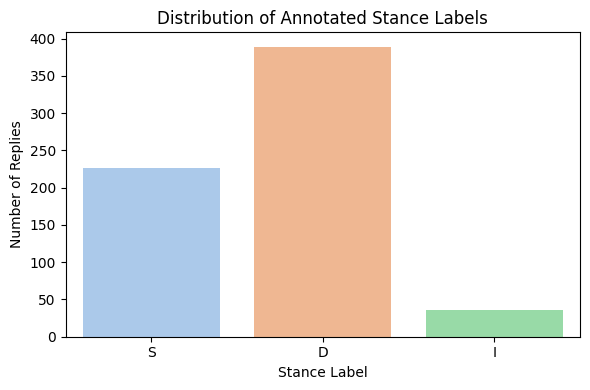

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the labeled dataset
# df = pd.read_csv("sample_dataset_labeled.csv")  # ensure this contains a 'label' column with values S, D, I

# Count each stance label
label_counts = df['label'].value_counts().reindex(['S', 'D', 'I'])

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='pastel')
plt.xlabel("Stance Label")
plt.ylabel("Number of Replies")
plt.title("Distribution of Annotated Stance Labels")
plt.tight_layout()
plt.show()


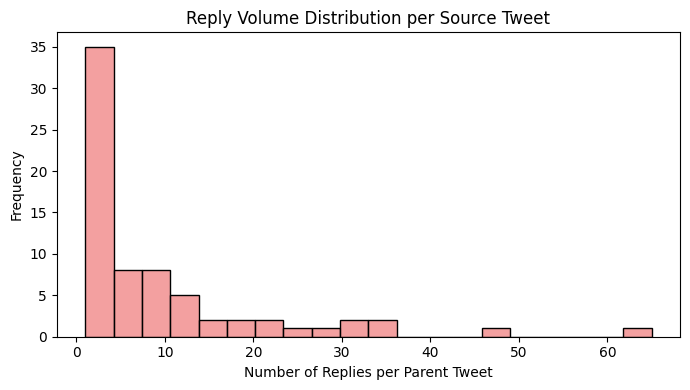

In [ ]:
# Count replies per parent tweet
reply_volume = df['parent_username'].value_counts()

plt.figure(figsize=(7, 4))
sns.histplot(reply_volume, bins=20, color='lightcoral')
plt.xlabel("Number of Replies per Parent Tweet")
plt.ylabel("Frequency")
plt.title("Reply Volume Distribution per Source Tweet")
plt.tight_layout()
plt.show()


In [ ]:
len(df[df["label"]=="I"])

36

In [ ]:
user = {}
for idx, row in df.iterrows():
  curr_label = 'Im'
  # if row['reply_username'] in user:
  #   curr_label = user[row['reply_username']]

  if pd.isna(row['parent_username']) :
    curr_label = 'Im'
  else :
    parent = row['parent_username']
    if parent not in user :
      print(parent)
      df = df.drop(idx)
      continue
    parent_label = user[parent]
    label = row['label']

    if parent_label == 'Im':
        if label == 'S':
            curr_label =  'Im'
        elif label == 'D':
            curr_label =  'Ii'
    elif parent_label == 'Ii':
        if label == 'S':
            curr_label =  'Ii'
        elif label == 'D':
            curr_label =  'Im'
    else :
      curr_label = 'U'

  df.at[idx, 'label'] = curr_label
  user[row['reply_username']] = curr_label

HA45z
HA45z
HA45z
stazkhan
khadijahN1
mohamudaish
mohamudaish
lemonscrolls
lemonscrolls
lemonscrolls


In [ ]:
df.head(10)

,label,parent_username,reply_username,reply_time_y
653,Im,NaN,BBCBreaking,2015-01-07 11:42:02+00:00
260,Im,BBCBreaking,DERRYCKGRIFFITH,2015-01-07 11:45:21+00:00
515,Im,BBCBreaking,pepvilar,2015-01-07 11:45:27+00:00
514,Im,BBCBreaking,Buzz81,2015-01-07 11:46:19+00:00
652,Im,NaN,piersmorgan,2015-01-07 11:47:07+00:00
173,Im,piersmorgan,Sports_Politic,2015-01-07 11:47:55+00:00
517,Im,BBCBreaking,j_griff,2015-01-07 11:47:57+00:00
449,Ii,piersmorgan,liberal_leftie,2015-01-07 11:48:06+00:00
161,Im,piersmorgan,AidanRoyale,2015-01-07 11:48:10+00:00
199,Im,piersmorgan,GunnersBaller,2015-01-07 11:48:11+00:00


In [ ]:
print(len(df[df["label"]=="U"]), len(df[df["label"]=="Im"]), len(df[df["label"]=="Ii"]))

0 360 286


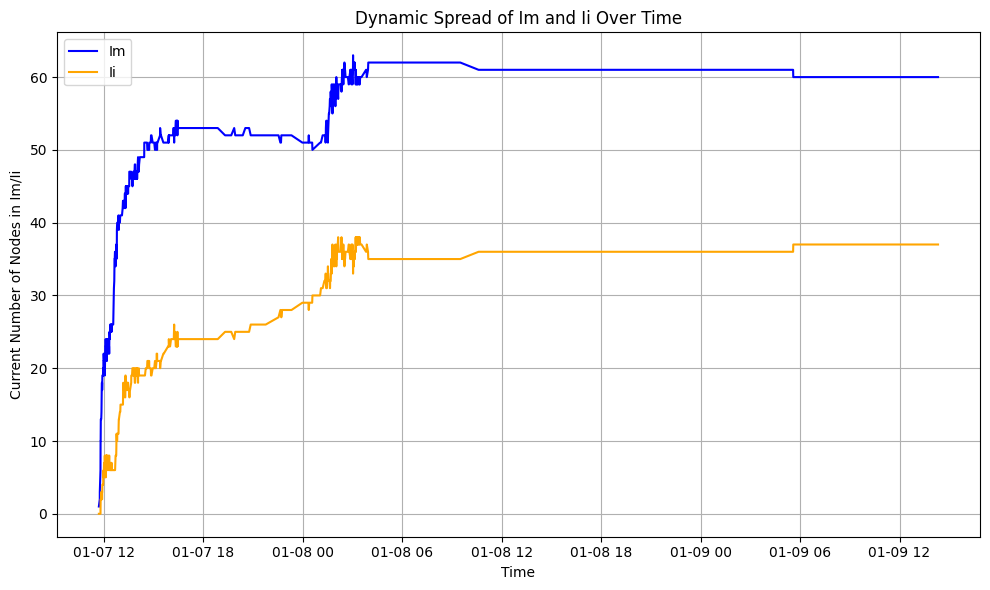

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure time is datetime and sorted
df['reply_time_y'] = pd.to_datetime(df['reply_time_y'])
df = df.sort_values('reply_time_y')

# Dictionary to store the latest label of each user
user_labels = {}

# Lists to track data for plotting
time_points = []
im_counts = []
ii_counts = []

# Iterate row by row
for _, row in df.iterrows():
    user = row['reply_username']
    label = row['label']
    time = row['reply_time_y']

    # Update the current label of the user
    user_labels[user] = label

    # Count how many users are currently in Im and Ii
    im_count = sum(1 for v in user_labels.values() if v == 'Im')
    ii_count = sum(1 for v in user_labels.values() if v == 'Ii')

    time_points.append(time)
    im_counts.append(im_count)
    ii_counts.append(ii_count)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'time': time_points,
    'Im': im_counts,
    'Ii': ii_counts
})

# Optional: drop duplicate timestamps if needed
plot_df = plot_df.drop_duplicates('time', keep='last')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(plot_df['time'], plot_df['Im'], label='Im', color='blue')
plt.plot(plot_df['time'], plot_df['Ii'], label='Ii', color='orange')

plt.xlabel('Time')
plt.ylabel('Current Number of Nodes in Im/Ii')
plt.title('Dynamic Spread of Im and Ii Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df

,label,parent_username,reply_username,reply_time_y
653,Im,NaN,BBCBreaking,2015-01-07 11:42:02+00:00
260,Im,BBCBreaking,DERRYCKGRIFFITH,2015-01-07 11:45:21+00:00
515,Im,BBCBreaking,pepvilar,2015-01-07 11:45:27+00:00
514,Im,BBCBreaking,Buzz81,2015-01-07 11:46:19+00:00
652,Im,NaN,piersmorgan,2015-01-07 11:47:07+00:00
...,...,...,...,...
309,Im,OicOzzie,Cognicenti,2015-01-09 05:33:14+00:00
335,Im,OicOzzie,Cognicenti,2015-01-09 05:33:45+00:00
317,Im,OicOzzie,Cognicenti,2015-01-09 05:34:53+00:00
123,Ii,OicOzzie,Cognicenti,2015-01-09 05:35:27+00:00


Directed graph with 97 nodes and 185 edges.


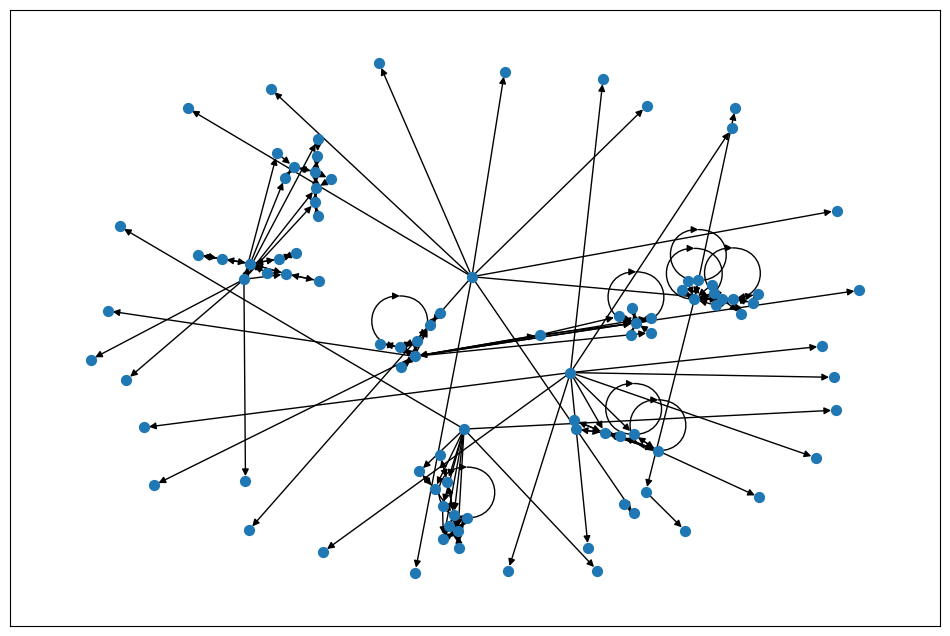

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Create a **directed** graph (because reply direction matters)
G = nx.DiGraph()

# Add nodes and record first activity time
for idx, row in df.iterrows():
    source_user = row['parent_username']
    reply_user = row['reply_username']
    stance = row['label']
    timestamp = pd.to_datetime(row['reply_time_y'])

    if reply_user not in G:
        G.add_node(reply_user, state=None, first_activity_time=timestamp)
    else:
        if timestamp < G.nodes[reply_user]['first_activity_time']:
            G.nodes[reply_user]['first_activity_time'] = timestamp

    if pd.notna(source_user):
        if source_user not in G:
            G.add_node(source_user, state=None, first_activity_time=timestamp)
        else:
            if timestamp < G.nodes[source_user]['first_activity_time']:
                G.nodes[source_user]['first_activity_time'] = timestamp

        G.add_edge(source_user, reply_user, stance=stance, timestamp=timestamp)

# Initialize node states:

df = df.sort_values(by='reply_time_y')

split_idx = int(0.6 * len(df))
df_train = df.iloc[:split_idx]
df_test = df.iloc[split_idx:]

exposed_to_Ii = 0
successful_Ii = 0

for idx, row in df_train.iterrows():
    source_user = row['parent_username']
    reply_user = row['reply_username']
    label = row['label']

    Im_count = sum(1 for neighbor in G.predecessors(reply_user) if G.nodes[neighbor]['state'] == 'Im')

    prev_label = G.nodes[reply_user]['state']

    if prev_label != 'Ii' :
      if Im_count > 0:
          exposed_to_Ii += 1
          if label == 'Ii':
              successful_Ii += 1

    G.nodes[reply_user]['state'] = label


G2 = G.copy()
# Optional: Print summary
print(f"Directed graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# Small visualization
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, node_size=50, with_labels=False, arrows=True)
plt.show()


In [ ]:
if exposed_to_Ii > 0:
    beta_estimate = successful_Ii / exposed_to_Ii
else:
    beta_estimate = 0

print("Estimated β (intervention influence):", beta_estimate)


Estimated β (intervention influence): 0.35046728971962615


In [ ]:
user = {}
for node in G.nodes :
  state = G.nodes[node].get('state', 'U')
  user[node] = state

Im_seeds = []
Ii_seeds =[]
test_nodes = []
for user, label in user.items() :
  if label == 'Im' :
    Im_seeds.append(user)
  elif label == 'Ii' :
    Ii_seeds.append(user)
  else:
    test_nodes.append(user)

In [ ]:
print(len(Im_seeds), len(Ii_seeds), len(test_nodes))

52 25 20


In [ ]:
# Re-import necessary libraries after kernel reset
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

nx.set_edge_attributes(G, 1.0, 'weight')  # Temporary weights

# Normalize edge weights by in-degree
for node in G.nodes():
    in_edges = G.in_edges(node)
    in_deg = len(in_edges)
    if in_deg > 0:
        for src, tgt in in_edges:
            G[src][tgt]['weight'] = 1 / np.sqrt(in_deg)

# for u, v, data in G.edges(data=True):
#     print(f"Edge ({u} → {v}) has weight: {data.get('weight', 'no weight')}")

# Initialize for CLT
thresholds_clt = {node: np.random.uniform(0, 0.3) for node in G.nodes()}
states_clt = {node: 'I' for node in G.nodes()}
for node in Im_seeds:
    states_clt[node] = 'Im'
for node in Ii_seeds:
    states_clt[node] = 'Ii'
clt_history = [{'Im': set(Im_seeds), 'Ii': set(Ii_seeds)}]

# Simulate CLT
for _ in range(10):
    new_states = {}
    for node in G.nodes():
        if states_clt[node] != 'I':
            continue
        misinfo_inf = sum(G[n][node]['weight'] for n in G.predecessors(node) if states_clt[n] == 'Im')
        interv_inf = sum(G[n][node]['weight'] for n in G.predecessors(node) if states_clt[n] == 'Ii')
        total_inf = max(misinfo_inf, interv_inf)
        if total_inf >= thresholds_clt[node]:
            if misinfo_inf > interv_inf:
                new_states[node] = 'Im'
            else:
                new_states[node] = 'Ii'
    if not new_states:
        break
    for node, new_state in new_states.items():
        states_clt[node] = new_state
    misinfo = {n for n, s in states_clt.items() if s == 'Im'}
    intervention = {n for n, s in states_clt.items() if s == 'Ii'}
    clt_history.append({'Im': misinfo.copy(), 'Ii': intervention.copy()})

In [ ]:
beta_estimate

0.35046728971962615

In [ ]:
# Simulate your model (multi-state with beta)
states_ours = {node: 'U' for node in G2.nodes()}
for node in Im_seeds:
    states_ours[node] = 'Im'
for node in Ii_seeds:
    states_ours[node] = 'Ii'
our_history = [{'Im': set(Im_seeds), 'Ii': set(Ii_seeds)}]
for _ in range(10):
    new_states = {}
    for node in G2.nodes():
        if states_ours[node] == 'Ii':
            continue
        inf_Im = sum(1 for n in G2.predecessors(node) if states_ours[n] == 'Im')
        inf_Ii = sum(1 for n in G2.predecessors(node) if states_ours[n] == 'Ii')
        if (inf_Ii*beta_estimate) >= inf_Im and inf_Ii > 0:
            new_states[node] = 'Ii'
        else :
          new_states[node] = 'Im'
        # print(new_states)
    if not new_states:
        break
    for node, new_state in new_states.items():
        states_ours[node] = new_state
    Im_set = {n for n, s in states_ours.items() if s == 'Im'}
    Ii_set = {n for n, s in states_ours.items() if s == 'Ii'}
    our_history.append({'Im': Im_set.copy(), 'Ii': Ii_set.copy()})

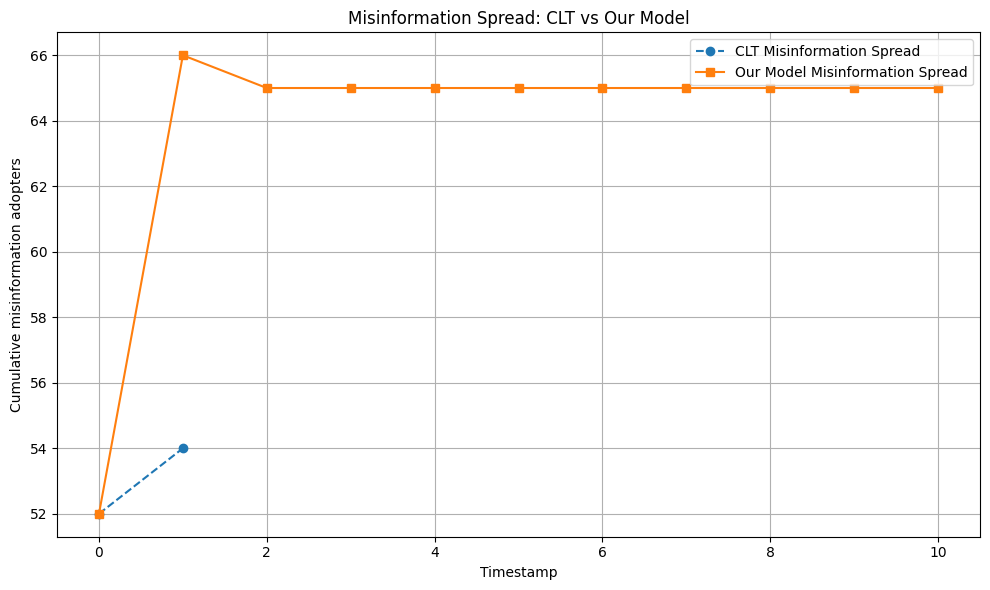

In [ ]:
# Plot results
clt_misinfo_counts = [len(step['Im']) for step in clt_history]
our_model_misinfo_counts = [len(step['Im']) for step in our_history]

plt.figure(figsize=(10, 6))
plt.plot(clt_misinfo_counts, label='CLT Misinformation Spread', linestyle='--', marker='o')
plt.plot(our_model_misinfo_counts, label='Our Model Misinformation Spread', linestyle='-', marker='s')
plt.xlabel("Timestamp")
plt.ylabel("Cumulative misinformation adopters")
plt.title("Misinformation Spread: CLT vs Our Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


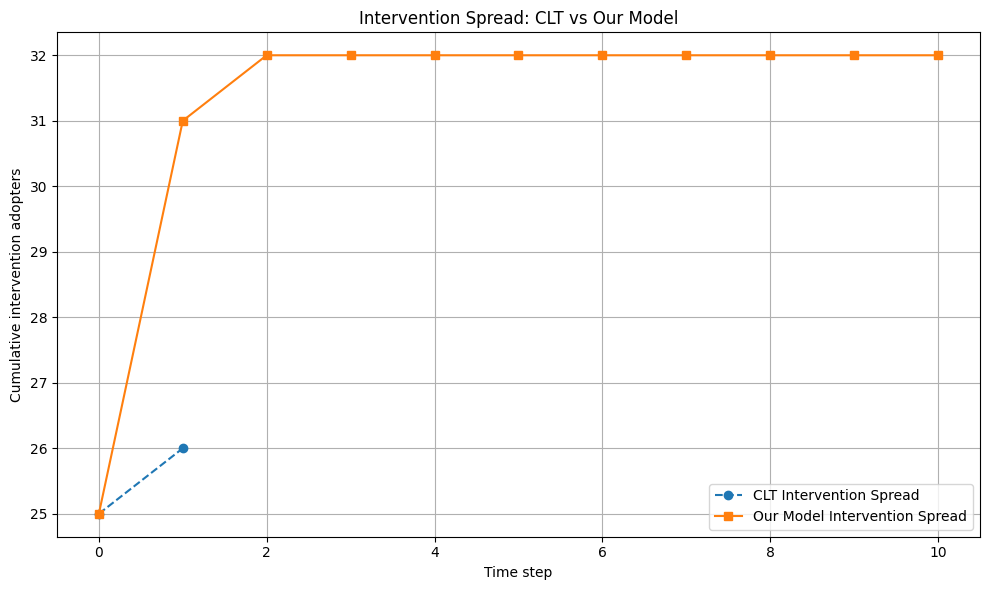

In [ ]:
# Plot results
clt_intervention_counts = [len(step['Ii']) for step in clt_history]
our_model_intervention_counts = [len(step['Ii']) for step in our_history]

plt.figure(figsize=(10, 6))
plt.plot(clt_intervention_counts, label='CLT Intervention Spread', linestyle='--', marker='o')
plt.plot(our_model_intervention_counts, label='Our Model Intervention Spread', linestyle='-', marker='s')
plt.xlabel("Time step")
plt.ylabel("Cumulative intervention adopters")
plt.title("Intervention Spread: CLT vs Our Model")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
ground_truth = {}
df = df.sort_values(by='reply_time_y')
for idx, row in df.iterrows() :
  ground_truth[row['reply_username']] = row['label']

final_step = our_history[-1]
our_model_predictions = {}
for node in final_step['Im']:
    our_model_predictions[node] = 'Im'
for node in final_step['Ii']:
    our_model_predictions[node] = 'Ii'

In [ ]:
final_step2 = clt_history[-1]
clt_predictions = {}
for node in final_step2['Im']:
    clt_predictions[node] = 'Im'
for node in final_step2['Ii']:
    clt_predictions[node] = 'Ii'

In [ ]:
len(our_model_predictions), len(clt_predictions)

(97, 80)

In [ ]:
import pandas as pd
from collections import Counter

# Define the classes you're interested in
label_set = ['Im', 'Ii', 'U']

# Get counts, filling in missing classes with 0
def count_with_defaults(d):
    counts = Counter(d.values())
    return [counts.get(label, 0) for label in label_set]

# Step 2: Create the summary table
summary_df = pd.DataFrame({
    'Class': label_set,
    'Ground Truth': count_with_defaults(ground_truth),
    'CLT Prediction': count_with_defaults(clt_predictions),
    'Our Model Prediction': count_with_defaults(our_model_predictions)
})

# Step 3: Display the table
print(summary_df)


  Class  Ground Truth  CLT Prediction  Our Model Prediction
0    Im            60              54                    65
1    Ii            37              26                    32
2     U             0               0                     0


In [ ]:
#Comparing common nodes only Ii vs Im
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def evaluate(pred_dict, name):
  y_true = []
  y_pred = []

  for node in common_nodes:
      true_label = ground_truth[node]
      pred_label = pred_dict.get(node)

      if pred_label not in ['Im', 'Ii']:
          continue  # skip if prediction is not Im or Ii

      y_true.append(1 if true_label == 'Im' else 0)
      y_pred.append(1 if pred_label == 'Im' else 0)

  if not y_true or not y_pred:
      print(f"{name}: No valid predictions to evaluate.")
      return

  precision = precision_score(y_true, y_pred, zero_division=0)
  recall = recall_score(y_true, y_pred, zero_division=0)
  f1 = f1_score(y_true, y_pred, zero_division=0)
  accuracy = accuracy_score(y_true, y_pred)

  print(f"--- {name} (Im vs Ii) ---")
  print(f"Precision (Im): {precision:.3f}")
  print(f"Recall (Im):    {recall:.3f}")
  print(f"F1 Score (Im):  {f1:.3f}")
  print(f"Accuracy:       {accuracy:.3f}")
  print()


common_nodes = set(our_model_predictions) & set(clt_predictions) & set(ground_truth)


evaluate(our_model_predictions, "Our Model")
evaluate(clt_predictions, "CLT Model")

--- Our Model (Im vs Ii) ---
Precision (Im): 0.938
Recall (Im):    0.900
F1 Score (Im):  0.918
Accuracy:       0.900

--- CLT Model (Im vs Ii) ---
Precision (Im): 0.926
Recall (Im):    1.000
F1 Score (Im):  0.962
Accuracy:       0.950



In [ ]:
#Comparing Im/Ii vs U
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Step 1: Define function to map labels to binary (1 = Im/Ii, 0 = U)
def binarize_labels(label_dict):
    return [1 if label in ('Im', 'Ii') else 0 for label in label_dict.values()]

# Step 2: Get common nodes across all 3 dictionaries
common_nodes = set(ground_truth) | set(clt_predictions) | set(our_model_predictions)

for node in common_nodes:
    if node not in clt_predictions:
        clt_predictions[node] = 'U'
    if node not in our_model_predictions:
        our_model_predictions[node] = 'U'
    if node not in ground_truth:
        ground_truth[node] = 'U'

print(len(ground_truth), len(clt_predictions), len(our_model_predictions))

# Step 3: Prepare label lists
y_true = binarize_labels(ground_truth)
y_pred_clt = binarize_labels(clt_predictions)
y_pred_our = binarize_labels(our_model_predictions)

# Step 4: Define function to compute and return metrics
def get_metrics(y_true, y_pred):
    return {
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'Accuracy': accuracy_score(y_true, y_pred)
    }

# Step 5: Compute and display results
metrics_clt = get_metrics(y_true, y_pred_clt)
metrics_our = get_metrics(y_true, y_pred_our)

# Format as a comparison table
import pandas as pd
df_eval = pd.DataFrame([metrics_clt, metrics_our], index=['CLT Model', 'Our Model'])
print(df_eval.round(3))


97 97 97
           Precision  Recall     F1  Accuracy
CLT Model        1.0   0.825  0.904     0.825
Our Model        1.0   1.000  1.000     1.000


In [ ]:
#Comparing test nodes only
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix

def evaluate(pred_dict, name):
  y_true = []
  y_pred = []

  for node in test_nodes:
      true_label = ground_truth[node]
      pred_label = pred_dict.get(node)

      if pred_label not in ['Im', 'Ii']:
          continue  # skip if prediction is not Im or Ii

      y_true.append(1 if true_label == 'Im' else 0)
      y_pred.append(1 if pred_label == 'Im' else 0)

  if not y_true or not y_pred:
      print(f"{name}: No valid predictions to evaluate.")
      return

  conf_matrix = confusion_matrix(y_true, y_pred)
  print(conf_matrix)

  precision = precision_score(y_true, y_pred, zero_division=0)
  recall = recall_score(y_true, y_pred, zero_division=0)
  f1 = f1_score(y_true, y_pred, zero_division=0)
  accuracy = accuracy_score(y_true, y_pred)

  print(f"--- {name} (Im vs Ii) ---")
  print(f"Precision (Im): {precision:.3f}")
  print(f"Recall (Im):    {recall:.3f}")
  print(f"F1 Score (Im):  {f1:.3f}")
  print(f"Accuracy:       {accuracy:.3f}")
  print()


common_nodes = set(our_model_predictions) & set(clt_predictions) & set(ground_truth)


evaluate(our_model_predictions, "Our Model")
evaluate(clt_predictions, "CLT Model")

[[ 2  8]
 [ 0 10]]
--- Our Model (Im vs Ii) ---
Precision (Im): 0.556
Recall (Im):    1.000
F1 Score (Im):  0.714
Accuracy:       0.600

[[1 2]
 [0 0]]
--- CLT Model (Im vs Ii) ---
Precision (Im): 0.000
Recall (Im):    0.000
F1 Score (Im):  0.000
Accuracy:       0.333



In [ ]:
#Comparing Im vs Ii for random 60, 5 times, then averaging it.
import random
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_both_models_on_random_samples(our_model_pred, clt_pred, ground_truth, label='Im', num_samples=60, runs=5):
    precision_our, recall_our = [], []
    precision_clt, recall_clt = [], []

    all_nodes = list(ground_truth.keys())

    for _ in range(runs):
        sampled_nodes = random.sample(all_nodes, num_samples)

        y_true = [1 if ground_truth[n] == label else 0 for n in sampled_nodes]
        y_pred_our = [1 if our_model_pred.get(n, 'U') == label else 0 for n in sampled_nodes]
        y_pred_clt = [1 if clt_pred.get(n, 'U') == label else 0 for n in sampled_nodes]

        # Our model
        p_our = precision_score(y_true, y_pred_our, zero_division=0)
        r_our = recall_score(y_true, y_pred_our, zero_division=0)

        # CLT model
        p_clt = precision_score(y_true, y_pred_clt, zero_division=0)
        r_clt = recall_score(y_true, y_pred_clt, zero_division=0)

        precision_our.append(p_our)
        recall_our.append(r_our)

        precision_clt.append(p_clt)
        recall_clt.append(r_clt)

    # Averages
    def avg(lst): return sum(lst) / len(lst) if lst else 0.0

    avg_precision_our = avg(precision_our)
    avg_recall_our = avg(recall_our)
    f1_our = 0.0
    if (avg_precision_our + avg_recall_our) > 0 :
      f1_our = 2 * (avg_precision_our * avg_recall_our) / (avg_precision_our + avg_recall_our)

    avg_precision_clt = avg(precision_clt)
    avg_recall_clt = avg(recall_clt)
    f1_clt = 0.0
    if (avg_precision_clt + avg_recall_clt) > 0 :
      f1_clt = 2 * (avg_precision_clt * avg_recall_clt) / (avg_precision_clt + avg_recall_clt)

    print(f"Label: {label}")
    print("=== Our Model ===")
    print(f"Avg Precision: {avg_precision_our:.3f}")
    print(f"Avg Recall:    {avg_recall_our:.3f}")
    print(f"Avg F1 Score:  {f1_our:.3f}\n")

    print("=== CLT Model ===")
    print(f"Avg Precision: {avg_precision_clt:.3f}")
    print(f"Avg Recall:    {avg_recall_clt:.3f}")
    print(f"Avg F1 Score:  {f1_clt:.3f}")

    return {
        "our_model": {
            "precision": avg_precision_our,
            "recall": avg_recall_our,
            "f1": f1_our
        },
        "clt_model": {
            "precision": avg_precision_clt,
            "recall":avg_recall_clt,
            "f1": f1_clt
        }
    }

evaluate_both_models_on_random_samples(our_model_predictions, clt_predictions, ground_truth)


Label: Im
=== Our Model ===
Avg Precision: 0.852
Avg Recall:    0.937
Avg F1 Score:  0.893

=== CLT Model ===
Avg Precision: 0.919
Avg Recall:    0.841
Avg F1 Score:  0.878


{'our_model': {'precision': 0.8516840882694542,
  'recall': 0.9374595445648077,
  'f1': 0.8925156849898791},
 'clt_model': {'precision': 0.918919799564961,
  'recall': 0.8410240604977448,
  'f1': 0.8782480835205296}}

In [ ]:
len(all_nodes)

97

In [ ]:
plot_df = plot_df.sort_values(by = 'time')

split_idx = int(0.6 * len(plot_df))
df2 = plot_df.iloc[split_idx:]

real_times = df2['time'].sort_values()
start_time = real_times.min()
end_time = real_times.max()

In [ ]:
num_steps = len(our_model_intervention_counts)  # e.g., clt_history or your output list

model_times = pd.date_range(start=start_time, end=end_time, periods=num_steps)

In [ ]:
num_steps2 = len(clt_intervention_counts)  # e.g., clt_history or your output list

model_times2 = pd.date_range(start=start_time, end=end_time, periods=num_steps2)

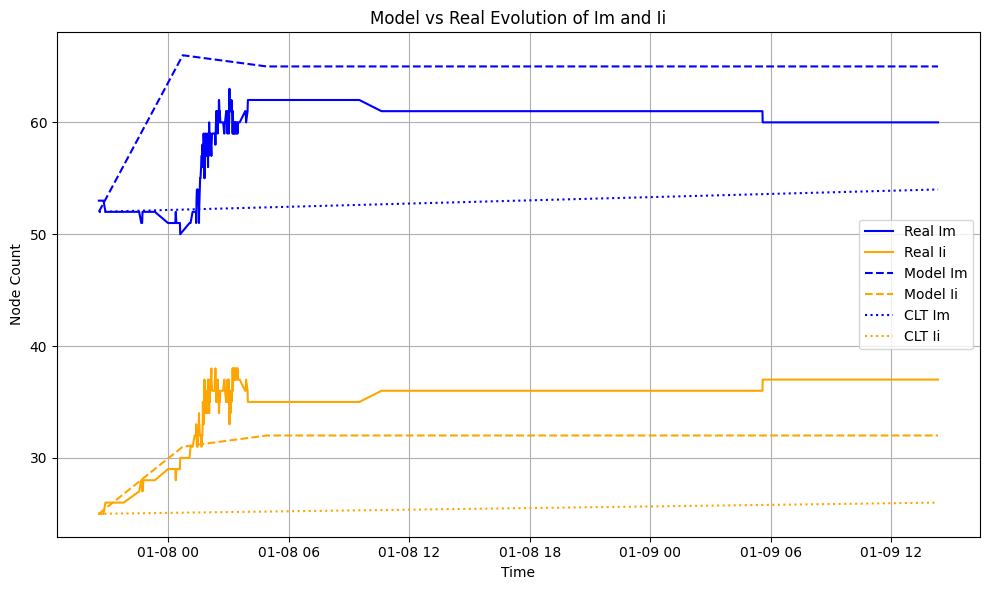

In [ ]:
plt.figure(figsize=(10, 6))

# Plot real data
plt.plot(df2['time'], df2['Im'], label='Real Im', color='blue')
plt.plot(df2['time'], df2['Ii'], label='Real Ii', color='orange')

# Plot model data
plt.plot(model_times, our_model_misinfo_counts, label='Model Im', linestyle='--', color='blue')
plt.plot(model_times, our_model_intervention_counts, label='Model Ii', linestyle='--', color='orange')

plt.plot(model_times2, clt_misinfo_counts, label='CLT Im', linestyle=':', color='blue')
plt.plot(model_times2, clt_intervention_counts, label='CLT Ii', linestyle=':', color='orange')

plt.xlabel('Time')
plt.ylabel('Node Count')
plt.title('Model vs Real Evolution of Im and Ii')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#EXTRA

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Filter nodes that are in both predictions and ground truth
common_nodes = [n for n in true_labels if n in predicted_labels2 and true_labels[n] in {'Im', 'Ii'}]

# Prepare label lists
y_true = [1 if true_labels[n] == 'Im' else 0 for n in common_nodes]
y_pred = [1 if predicted_labels2[n] == 'Im' else 0 for n in common_nodes]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (Misinfo = 1, Intervention = 0):")
print(cm)

# Optionally, print precision, recall, f1
report = classification_report(y_true, y_pred, target_names=['Intervention', 'Misinfo'])
print("\nClassification Report:")
print(report)

Confusion Matrix (Misinfo = 1, Intervention = 0):
[[22  3]
 [ 2 52]]

Classification Report:
              precision    recall  f1-score   support

Intervention       0.92      0.88      0.90        25
     Misinfo       0.95      0.96      0.95        54

    accuracy                           0.94        79
   macro avg       0.93      0.92      0.93        79
weighted avg       0.94      0.94      0.94        79



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Union of all nodes that appear in either prediction or ground truth
all_nodes = set(true_labels.keys())

# Optional: only consider nodes where either label is Im or not Im
all_nodes = [n for n in all_nodes if true_labels.get(n) is not None or predicted_labels2.get(n) is not None]

# Convert labels: Im → 1, not Im → 0
y_true = [1 if true_labels.get(n) == 'Im' else 0 for n in all_nodes]
y_pred = [1 if predicted_labels2.get(n) == 'Im' else 0 for n in all_nodes]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (Im = 1, Not Im = 0):")
print(cm)

# Classification report
report = classification_report(y_true, y_pred, target_names=['Not Im', 'Im'])
print("\nClassification Report:")
print(report)


Confusion Matrix (Im = 1, Not Im = 0):
[[33  4]
 [10 50]]

Classification Report:
              precision    recall  f1-score   support

      Not Im       0.77      0.89      0.82        37
          Im       0.93      0.83      0.88        60

    accuracy                           0.86        97
   macro avg       0.85      0.86      0.85        97
weighted avg       0.87      0.86      0.86        97



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Union of all nodes that appear in either prediction or ground truth
all_nodes = set(true_labels.keys())

# Optional: only consider nodes where either label is Im or not Im
all_nodes = [n for n in all_nodes if true_labels.get(n) is not None or predicted_labels.get(n) is not None]

# Convert labels: Im → 1, not Im → 0
y_true = [1 if true_labels.get(n) == 'Im' else 0 for n in all_nodes]
y_pred = [1 if predicted_labels.get(n) == 'Im' else 0 for n in all_nodes]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (Im = 1, Not Im = 0):")
print(cm)

# Classification report
report = classification_report(y_true, y_pred, target_names=['Not Im', 'Im'])
print("\nClassification Report:")
print(report)


Confusion Matrix (Im = 1, Not Im = 0):
[[27 10]
 [ 5 55]]

Classification Report:
              precision    recall  f1-score   support

      Not Im       0.84      0.73      0.78        37
          Im       0.85      0.92      0.88        60

    accuracy                           0.85        97
   macro avg       0.84      0.82      0.83        97
weighted avg       0.85      0.85      0.84        97



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Union of all nodes that appear in either prediction or ground truth
all_nodes = set(true_labels.keys())

# Optional: only consider nodes where either label is Im or not Im
all_nodes = [n for n in all_nodes if true_labels.get(n) is not None or predicted_labels2.get(n) is not None]

# Convert labels: Im → 1, not Im → 0
y_true = [1 if true_labels.get(n) == 'Ii' else 0 for n in all_nodes]
y_pred = [1 if predicted_labels2.get(n) == 'Ii' else 0 for n in all_nodes]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (Ii = 1, Not Ii = 0):")
print(cm)

# Classification report
report = classification_report(y_true, y_pred, target_names=['Not Ii', 'Ii'])
print("\nClassification Report:")
print(report)


Confusion Matrix (Ii = 1, Not Ii = 0):
[[60  0]
 [11 26]]

Classification Report:
              precision    recall  f1-score   support

      Not Ii       0.85      1.00      0.92        60
          Ii       1.00      0.70      0.83        37

    accuracy                           0.89        97
   macro avg       0.92      0.85      0.87        97
weighted avg       0.90      0.89      0.88        97



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Union of all nodes that appear in either prediction or ground truth
all_nodes = set(true_labels.keys())

# Optional: only consider nodes where either label is Im or not Im
all_nodes = [n for n in all_nodes if true_labels.get(n) is not None or predicted_labels.get(n) is not None]

# Convert labels: Ii → 1, not Ii → 0
y_true = [1 if true_labels.get(n) == 'Ii' else 0 for n in all_nodes]
y_pred = [1 if predicted_labels.get(n) == 'Ii' else 0 for n in all_nodes]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix (Ii = 1, Not Ii = 0):")
print(cm)

# Classification report
report = classification_report(y_true, y_pred, target_names=['Not Ii', 'Ii'])
print("\nClassification Report:")
print(report)


Confusion Matrix (Ii = 1, Not Ii = 0):
[[46 17]
 [10 24]]

Classification Report:
              precision    recall  f1-score   support

      Not Ii       0.82      0.73      0.77        63
          Ii       0.59      0.71      0.64        34

    accuracy                           0.72        97
   macro avg       0.70      0.72      0.71        97
weighted avg       0.74      0.72      0.73        97



In [ ]:
import numpy as np
from scipy.stats import pearsonr
from scipy.interpolate import interp1d

# Example: real_Im has 20 points, model_Im has 11
x_real = np.linspace(0, 1, len(df2['Ii']))
x_model = np.linspace(0, 1, len(our_model_intervention_counts))

# Interpolate real data to match model time points
interp_real = interp1d(x_real, df2['Ii'], kind='linear')
real_Im_resampled = interp_real(x_model)

# Now compute correlation
corr, _ = pearsonr(real_Im_resampled, our_model_intervention_counts)
print(f"Correlation between our model and real Im: {corr:.4f}")


Correlation between our model and real Im: 0.8584


In [ ]:
import numpy as np
from scipy.stats import pearsonr
from scipy.interpolate import interp1d

# Example: real_Im has 20 points, model_Im has 11
x_real = np.linspace(0, 1, len(df2['Ii']))
x_model = np.linspace(0, 1, len(clt_intervention_counts))

# Interpolate real data to match model time points
interp_real = interp1d(x_real, df2['Ii'], kind='linear')
real_Im_resampled = interp_real(x_model)

# Now compute correlation
corr, _ = pearsonr(real_Im_resampled, clt_intervention_counts)
print(f"Correlation between CLT model and real Im: {corr:.4f}")


Correlation between CLT model and real Im: 1.0000


In [ ]:
len(real_Im_resampled)

11

In [ ]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assume real_values has more points than model_values
x_model = np.linspace(0, 1, len(our_model_intervention_counts))
x_real = np.linspace(0, 1, len(df2['Ii']))

# Interpolate real to model length
real_interp = interp1d(x_real, df2['Ii'], kind='linear')
real_resampled = real_interp(x_model)

# Compute MAE
mae = mean_absolute_error(real_resampled, our_model_intervention_counts)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 7.2182


In [ ]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assume real_values has more points than model_values
x_model = np.linspace(0, 1, len(clt_intervention_counts))
x_real = np.linspace(0, 1, len(df2['Ii']))

# Interpolate real to model length
real_interp = interp1d(x_real, df2['Ii'], kind='linear')
real_resampled = real_interp(x_model)

# Compute MAE
mae = mean_absolute_error(real_resampled, clt_intervention_counts)
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Mean Absolute Error (MAE): 5.0000


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
from scipy.interpolate import interp1d

# --- Replace these with your actual data ---
# Lists of values over time
real_Ii = df2['Ii']        # ground truth time series
model_Ii = our_model_intervention_counts        # your model's output
clt_Ii = clt_intervention_counts          # CLT model output

# --- Interpolation to same length (if needed) ---
def resample(reference, target):
    x_ref = np.linspace(0, 1, len(reference))
    x_target = np.linspace(0, 1, target)
    f = interp1d(x_ref, reference, kind='linear')
    return f(x_target)

# Make all series the same length as the shortest one
min_len = min(len(real_Ii), len(model_Ii), len(clt_Ii))
real_Ii_resampled  = resample(real_Ii, min_len)
model_Ii_resampled = resample(model_Ii, min_len)
clt_Ii_resampled   = resample(clt_Ii, min_len)

# --- Evaluation function ---
def evaluate(pred, truth, name="Model"):
    mae = mean_absolute_error(truth, pred)
    rmse = np.sqrt(mean_squared_error(truth, pred))
    corr, _ = pearsonr(truth, pred)
    print(f"\n{name} Evaluation:")
    print(f"  MAE  = {mae:.4f}")
    print(f"  RMSE = {rmse:.4f}")
    print(f"  Pearson Correlation = {corr:.4f}")

# --- Evaluate both models ---
evaluate(model_Ii_resampled, real_Ii_resampled, name="Your Model")
evaluate(clt_Ii_resampled, real_Ii_resampled, name="CLT Model")



Your Model Evaluation:
  MAE  = 3.5000
  RMSE = 4.9497
  Pearson Correlation = 1.0000

CLT Model Evaluation:
  MAE  = 5.0000
  RMSE = 7.0711
  Pearson Correlation = 1.0000
